<a href="https://colab.research.google.com/github/Sesharaochalla/ML-Project/blob/main/Movie_Box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing The Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud
from ast import literal_eval

# Reading the Dataset

In [ ]:
credits=pd.read_csv(r"/content/tmdb_5000_credits.csv")
movies_df=pd.read_csv(r"/content/tmdb_5000_movies.csv")

## Exploratory Data Analysis

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
credits.tail()

,movie_id,title,cast,crew
4808,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4809,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4810,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4811,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4812,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


In [ ]:
print("credits:",credits.columns)
print("movies_df:",movies_df.columns)

credits: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
movies_df: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [ ]:
print("credits:",credits.shape)
print("movies_df:",movies_df.shape)

credits: (4813, 4)
movies_df: (4803, 20)


In [ ]:
# Convert 'id' column in movies_df to numeric, coerce errors to NaN
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce')

# Convert 'id' column to int64, but fill NaN values with -1 to avoid duplicates
movies_df['id'] = movies_df['id'].fillna(-1).astype('int64')

# Ensure 'id' column in credits_column_renamed is also of type int64
credits_column_renamed['id'] = pd.to_numeric(credits_column_renamed['id'], errors='coerce').fillna(-1).astype('int64')

# Now you can merge
movies_df = movies_df.merge(credits_column_renamed, on="id")

In [ ]:
movies_df.shape

(4803, 23)

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
movies_df.describe() # Use movies_df instead of movies

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Converting json objects to strings

In [ ]:
import json

def safe_json_loads(x):
    try:
        return json.loads(x)
    except (json.JSONDecodeError, TypeError):
        return None  # or handle the error in a way that makes sense for your data

movies_df['crew'] = movies_df['crew'].apply(safe_json_loads)

def director(x):
    if isinstance(x, list): # Check if the data is a list after applying safe_json_loads
        for i in x:
            if i['job'] == 'Director':
                return i['name']

movies_df['crew'] = movies_df['crew'].apply(director)
movies_df.rename(columns={'crew':'director'},inplace=True)

In [ ]:
from ast import literal_eval
features = ['keywords','genres']
for feature in features:
  movies_df[feature] = movies_df[feature].apply(literal_eval)

In [ ]:
def get_list(x):
  if isinstance(x, list):
    names = [i['name'] for i in x]
    if len(names) > 1:
      names = names[:1]
    return names
  return []

In [ ]:
features = ['keywords', 'genres']
for feature in features:
  movies_df[feature] = movies_df[feature].apply(get_list) # Changed movies to movies_df

In [ ]:
movies_df['genres'] # Changed movies to movies_df

,genres
0,[Action]
1,[Adventure]
2,[Action]
3,[Action]
4,[Action]
...,...
4798,[Action]
4799,[Comedy]
4800,[Comedy]
4801,[]


In [ ]:
movies_df['genres'] = movies_df['genres'].str.join(',') # Changed movies to movies_df

In [ ]:
movies_df['genres']

,genres
0,Action
1,Adventure
2,Action
3,Action
4,Action
...,...
4798,Action
4799,Comedy
4800,Comedy
4801,


In [ ]:
numeric_df = movies_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr() # Changed numberic_df to numeric_df
print(correlation_matrix)

                budget        id  popularity   revenue   runtime  \
budget        1.000000 -0.089377    0.505414  0.730823  0.269851   
id           -0.089377  1.000000    0.031202 -0.050425 -0.153536   
popularity    0.505414  0.031202    1.000000  0.644724  0.225502   
revenue       0.730823 -0.050425    0.644724  1.000000  0.251093   
runtime       0.269851 -0.153536    0.225502  0.251093  1.000000   
vote_average  0.093146 -0.270595    0.273952  0.197150  0.375046   
vote_count    0.593180 -0.004128    0.778130  0.781487  0.271944   

              vote_average  vote_count  
budget            0.093146    0.593180  
id               -0.270595   -0.004128  
popularity        0.273952    0.778130  
revenue           0.197150    0.781487  
runtime           0.375046    0.271944  
vote_average      1.000000    0.312997  
vote_count        0.312997    1.000000  


# Checking for null values

In [ ]:
movies_df.isnull().any()

,0
budget,False
genres,False
homepage,True
id,False
keywords,False
original_language,False
original_title,False
overview,True
popularity,False
production_companies,False


In [ ]:
movies_df.isnull().sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


<Axes: >

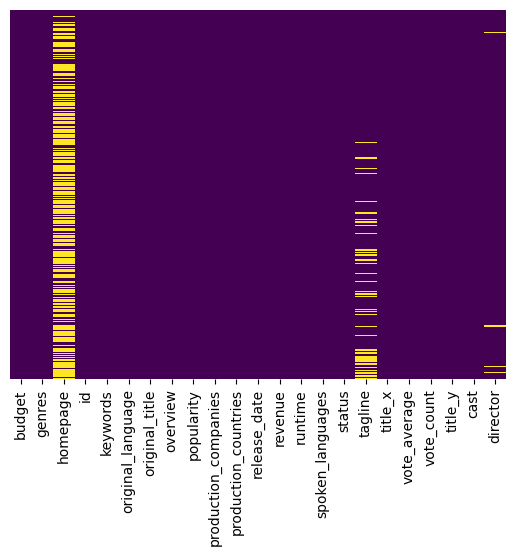

In [ ]:
sns.heatmap(movies_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
movies = movies_df.dropna(subset = ['director','runtime'])

In [ ]:
movies_df["revenue"]=movies_df["revenue"].floordiv(1000000)
movies_df["budget"]=movies_df["budget"].floordiv(1000000)

In [ ]:
movies_df = movies_df[movies_df['budget'] !=0]

In [ ]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format='%d/%m/%Y', dayfirst=True, errors='coerce') #The format was not specified and likely was not in the year-day-month format. Use errors='coerce' to handle invalid dates
movies_df['release_month'] = movies_df['release_date'].dt.month
movies_df['release_DOW'] = movies_df['release_date'].dt.dayofweek

# Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot of Runtime')

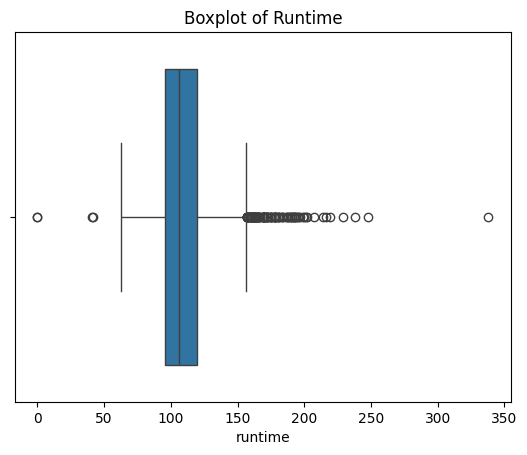

In [ ]:
sns.boxplot(x=movies_df['runtime'])
plt.title('Boxplot of Runtime')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot of Revenue')

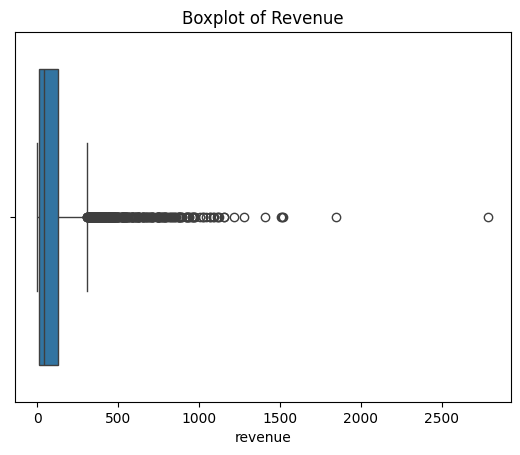

In [ ]:
sns.boxplot(x=movies_df['revenue'])
plt.title('Boxplot of Revenue')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot of Budget')

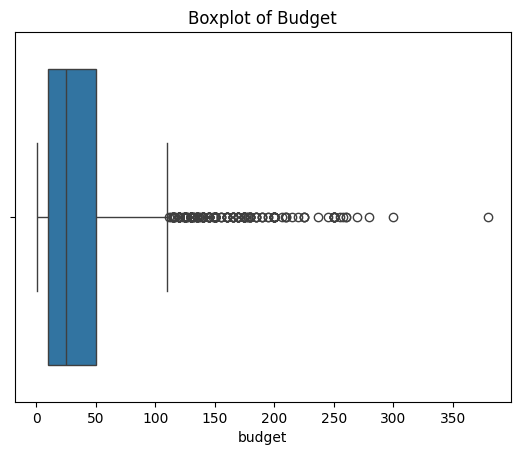

In [ ]:
sns.boxplot(x=movies_df['budget'])
plt.title('Boxplot of Budget')

<Axes: >

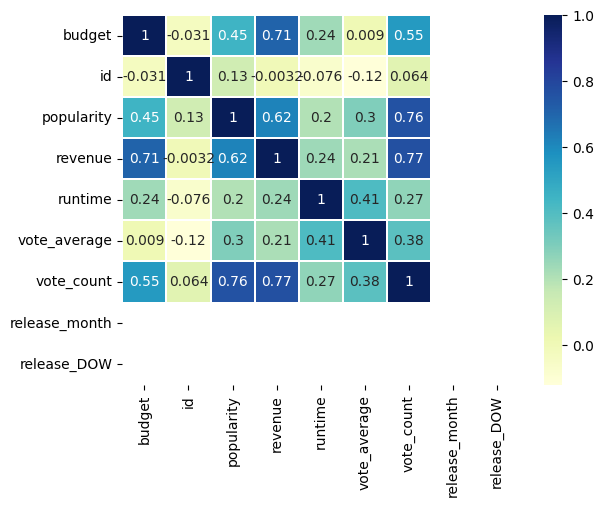

In [ ]:
# Convert columns with numeric data to the correct data type
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
movies_df['runtime'] = pd.to_numeric(movies_df['runtime'], errors='coerce')

# Drop non-numeric columns before calculating the correlation
numeric_df = movies_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), cmap='YlGnBu', annot=True, linewidths=0.2)

In [ ]:
movies_df['log_revenue'] = np.log1p(movies_df['revenue']) # Changed 'loglp' to 'log1p'
movies_df['log_budget'] = np.log1p(movies_df['budget']) # Changed 'loglp' to 'log1p'

<ipython-input-45-e2ec47479909>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


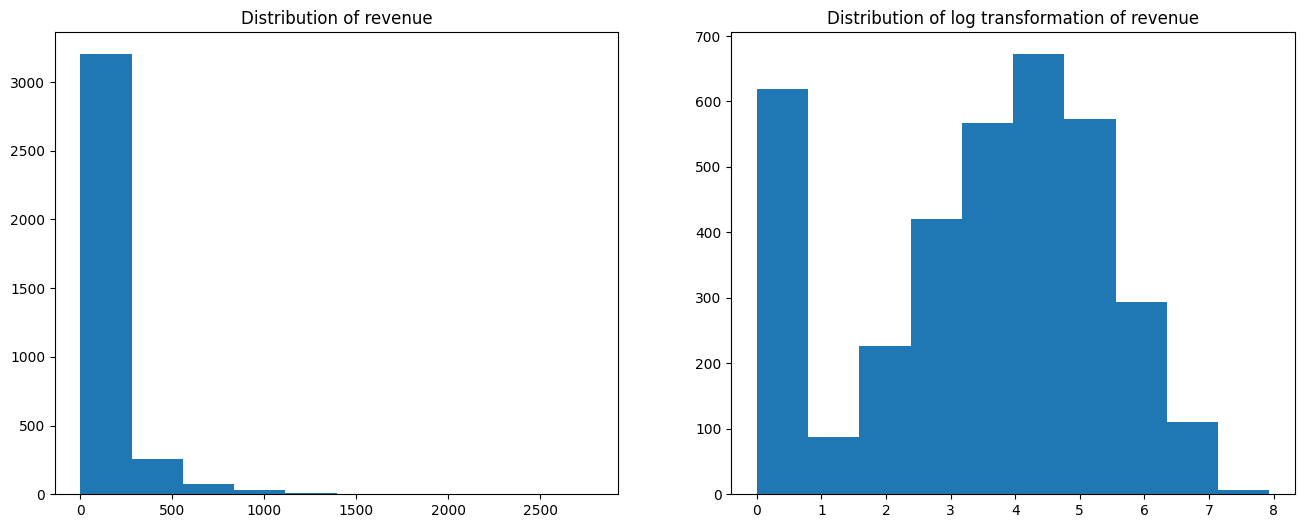

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(movies_df['revenue']);
plt.title("Distribution of revenue");
plt.subplot(1, 2, 2)
plt.hist(movies_df['log_revenue']);
plt.title('Distribution of log transformation of revenue');

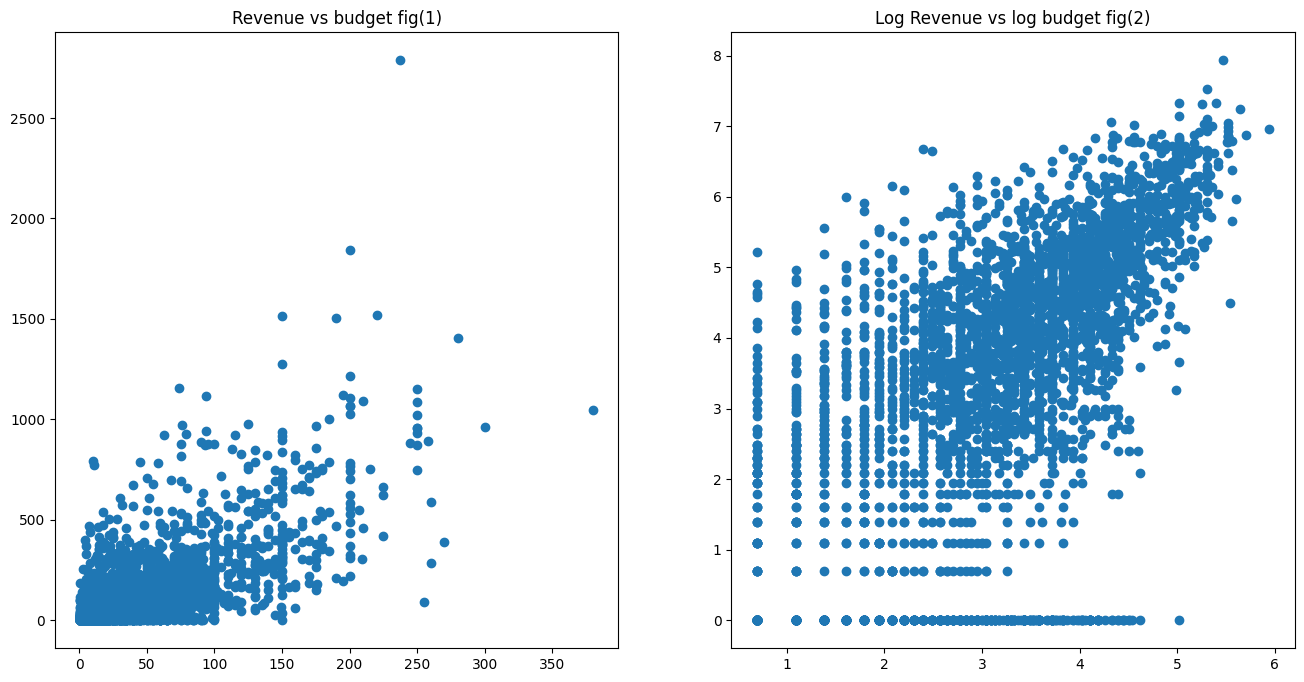

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(movies_df['budget'], movies_df['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(movies_df['log_budget'], movies_df['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

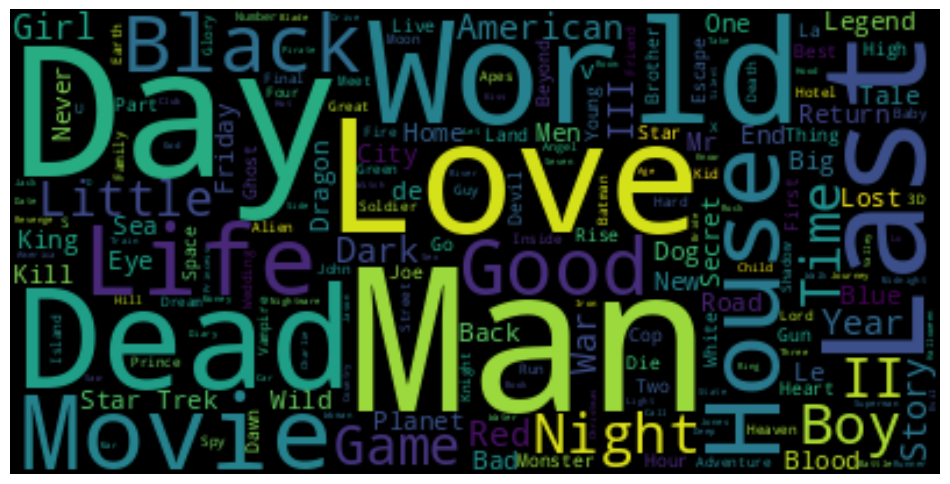

In [ ]:
wordcloud = WordCloud().generate(movies_df.original_title.to_string())
sns.set(rc={'figure.figsize':(12,8)}) # Changed 'figure.figuresize' to 'figure.figsize'
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


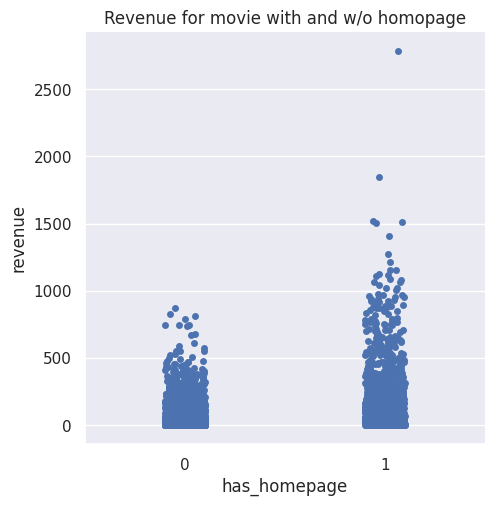

In [ ]:
movies_df['has_homepage'] = 0
movies_df.loc[movies_df['homepage'].isnull() == False, 'has_homepage'] = 1
sns.catplot(x='has_homepage' , y='revenue', data=movies_df); # Changed movies to movies_df
plt.title('Revenue for movie with and w/o homopage');

Text(0.5, 1.0, 'revenue')

<Figure size 1500x800 with 0 Axes>

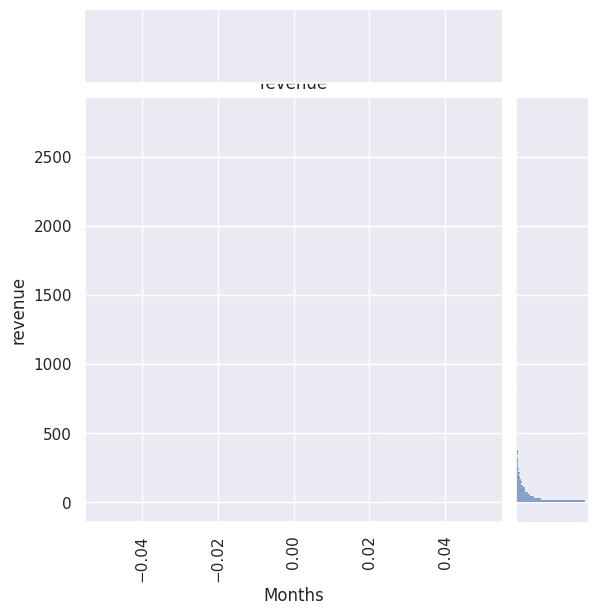

In [ ]:
plt.figure(figsize=(15,8))
sns.jointplot(x=movies_df.release_month, y=movies_df.revenue); # Changed to use x and y parameters
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.title('revenue')

# Dropping the columns

In [ ]:
movies_df_box = movies_df.drop(['homepage','id','keywords','original_language','original_title','overview',
                                'production_companies','production_countries','release_date','spoken_languages',
                                'status','tagline','title_x','title_y','cast'],axis = 1)
# Removed the columns that were not found in the DataFrame. Fixed the typo in 'original_language'.

In [ ]:
movies_df_box.isnull().sum()

,0
budget,0
genres,0
popularity,0
revenue,0
runtime,1
vote_average,0
vote_count,0
director,14
release_month,3578
release_DOW,3578


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as C # Added a comment
cat=['director','genres']
for i in movies_df_box[cat]:
  print("LABEL ENCODING OF:",i)
  LE = LabelEncoder()
  print(C(movies_df_box[i])) # Changed c to C and movies_box to movies_df_box
  movies_df_box[i] = LE.fit_transform(movies_df_box[i]) # Changed movies_box to movies_df_box
  print(C(movies_df_box[i])) # Changed c to C and movies_box to movies_df_box

LABEL ENCODING OF: director
Counter({'Steven Spielberg': 27, 'Clint Eastwood': 19, 'Ridley Scott': 16, 'Woody Allen': 16, 'Martin Scorsese': 15, 'Steven Soderbergh': 15, 'Renny Harlin': 15, 'Robert Rodriguez': 15, None: 14, 'Tim Burton': 14, 'Oliver Stone': 14, 'Robert Zemeckis': 13, 'Michael Bay': 12, 'Ron Howard': 12, 'Joel Schumacher': 12, 'Tony Scott': 12, 'Brian De Palma': 12, 'Francis Ford Coppola': 12, 'Barry Levinson': 11, 'Bobby Farrelly': 11, 'David Fincher': 10, 'Shawn Levy': 10, 'Richard Donner': 10, 'Chris Columbus': 10, 'Paul W.S. Anderson': 10, 'Rob Reiner': 10, 'Joel Coen': 10, 'Wes Craven': 10, 'Kevin Smith': 10, 'Richard Linklater': 10, 'Sam Raimi': 9, 'Peter Jackson': 9, 'Rob Cohen': 9, 'M. Night Shyamalan': 9, 'John McTiernan': 9, 'Spike Lee': 9, 'John Carpenter': 9, 'Christopher Nolan': 8, 'Bryan Singer': 8, 'Brett Ratner': 8, 'Martin Campbell': 8, 'Quentin Tarantino': 8, 'Simon West': 8, 'Dennis Dugan': 8, 'F. Gary Gray': 8, 'Antoine Fuqua': 8, 'Garry Marshall': 8

In [ ]:
mapping_dict ={}
category_col=["director","genres"]
for col in category_col:
  LE_name_mapping = dict(zip(LE.classes_,
                             LE.transform(LE.classes_)))
  mapping_dict[col]= LE_name_mapping
  print(mapping_dict)

{'director': {'': 0, 'Action': 1, 'Adventure': 2, 'Animation': 3, 'Comedy': 4, 'Crime': 5, 'Documentary': 6, 'Drama': 7, 'Family': 8, 'Fantasy': 9, 'History': 10, 'Horror': 11, 'Music': 12, 'Mystery': 13, 'Romance': 14, 'Science Fiction': 15, 'TV Movie': 16, 'Thriller': 17, 'War': 18, 'Western': 19}}
{'director': {'': 0, 'Action': 1, 'Adventure': 2, 'Animation': 3, 'Comedy': 4, 'Crime': 5, 'Documentary': 6, 'Drama': 7, 'Family': 8, 'Fantasy': 9, 'History': 10, 'Horror': 11, 'Music': 12, 'Mystery': 13, 'Romance': 14, 'Science Fiction': 15, 'TV Movie': 16, 'Thriller': 17, 'War': 18, 'Western': 19}, 'genres': {'': 0, 'Action': 1, 'Adventure': 2, 'Animation': 3, 'Comedy': 4, 'Crime': 5, 'Documentary': 6, 'Drama': 7, 'Family': 8, 'Fantasy': 9, 'History': 10, 'Horror': 11, 'Music': 12, 'Mystery': 13, 'Romance': 14, 'Science Fiction': 15, 'TV Movie': 16, 'Thriller': 17, 'War': 18, 'Western': 19}}


# Splitting the Dataset into Dependent and Independent variable

In [ ]:
x=movies_df_box.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
x=pd.DataFrame(x,columns=['budget','genres','popularity','runtime','vote_average','vote_count','director','release_month','release_DOW'])
x

,budget,genres,popularity,runtime,vote_average,vote_count,director,release_month,release_DOW
0,237,1,150.437577,162.0,7.2,11800,616,NaN,NaN
1,300,2,139.082615,169.0,6.9,4500,536,NaN,NaN
2,245,1,107.376788,148.0,6.3,4466,1345,NaN,NaN
3,250,1,112.312950,165.0,7.6,9106,245,NaN,NaN
4,260,1,43.926995,132.0,6.1,2124,65,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4586,35,4,38.100488,99.0,5.8,923,1534,NaN,NaN
4596,6,11,19.331884,89.0,6.0,316,468,NaN,NaN
4682,13,11,4.009379,95.0,4.6,24,446,NaN,NaN
4720,8,7,9.452808,120.0,6.5,178,1085,NaN,NaN


In [ ]:
y=movies_df_box.iloc[:,3]
y=pd.DataFrame(y,columns=['revenue'])
y

,revenue
0,2787
1,961
2,880
3,1084
4,284
...,...
4586,170
4596,0
4682,0
4720,15


In [ ]:
y

,revenue
0,2787
1,961
2,880
3,1084
4,284
...,...
4586,170
4596,0
4682,0
4720,15


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


array([[ 4.61424146, -1.10896366,  3.53397366, ..., -0.46684244,
                nan,         nan],
       [ 6.0817277 , -0.88301571,  3.20923763, ..., -0.63611389,
                nan,         nan],
       [ 4.80058892, -1.10896366,  2.30249532, ...,  1.07564369,
                nan,         nan],
       ...,
       [-0.60348739,  1.15051586, -0.653668  , ..., -0.82654428,
                nan,         nan],
       [-0.71995455,  0.24672405, -0.49799354, ...,  0.52551146,
                nan,         nan],
       [-0.81312828,  2.50620357,  0.02278378, ...,  1.61519645,
                nan,         nan]])

In [ ]:
pickle.dump(sc,open("scalar_movies.pkl","wb"))

# Split the dataset into Train set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

# Train and Test the Model using Linear Regression

In [ ]:
import pandas as pd # Import pandas for data manipulation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values

# Convert x to DataFrame
x = pd.DataFrame(x)

# Check for missing values
print(x.isnull().sum())

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
x = pd.DataFrame(imputer.fit_transform(x)) # Fit and transform the data

# Now continue with your existing code
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

mr=LinearRegression()
mr.fit(x_train,y_train)

0       0
1       0
2       0
3       1
4       0
5       0
6       0
7    3578
8    3578
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [7 8]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LinearRegression()

# Model Evalution

In [ ]:
import pandas as pd # Import pandas for data manipulation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values
from sklearn import metrics
import numpy as np

# Convert x to DataFrame
x = pd.DataFrame(x)

# Check for missing values
print(x.isnull().sum())

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
x = pd.DataFrame(imputer.fit_transform(x)) # Fit and transform the data

# Now continue with your existing code
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

mr=LinearRegression()
mr.fit(x_train,y_train)

# Generate predictions using the trained model
y_pred_mr = mr.predict(x_test) # Added this line to define y_pred_mr

print("MAE:",metrics.mean_absolute_error(y_test,y_pred_mr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_mr))) # Corrected the function and used np.sqrt

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64
MAE: 60.72927786911419
RMSE: 103.71039435368147


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mr)

0.693370437923869

# Save The Model

In [ ]:
import pickle
pickle.dump(mr,open("model_movies.pkl","wb"))

# Predicting the Model Using Output

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
import numpy as np
import pickle

# Load the model and scaler
model = pickle.load(open("model_movies.pkl","rb"))
scalar = pickle.load(open("scalar_movies.pkl","rb"))

# Input data
input = [[50,8,20.239061,88,5,366,719,7,3]]

# Check for NaN values in the input data before scaling
print(np.isnan(input).any())

# Transform the input data using the loaded scaler
input = scalar.transform(input)

# Check for NaN values in the scaled input data
print(np.isnan(input).any())

# If there are NaN values, handle them (e.g., impute)
if np.isnan(input).any():
  imputer = SimpleImputer(strategy='mean')
  input = imputer.fit_transform(input)

# Generate predictions
prediction = model.predict(input)

# Print the prediction
print(prediction)

False
True
[[86.38032601]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [7 8]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
prediction

array([[86.38032601]])